# 前言

- 这个文件探索的数据是基于文件 `1.预处理.ipynb` 处理后得到的数据 `JD_data_processed.csv` 进行的
- 代码基本上和`1.预处理.ipynb`中一致，只是数据集不同，相当于是对处理后的数据再探索一次

In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# 让画图内置
%matplotlib inline

# 忽略版本号之类的warnings
import warnings
warnings.filterwarnings('ignore')
import os
from datetime import date

# 导入数据

In [65]:
# 导入数据
original_data = pd.read_csv('JD_data\JD_data_processed.csv')

In [66]:
# 数据量
data = original_data.copy()
data.shape

(20474, 19)

In [67]:
# 修改类型
data['action_date']= pd.to_datetime(data['action_date'])
data['customer_register_date']= pd.to_datetime(data['customer_register_date'])
data['shop_register_date']= pd.to_datetime(data['shop_register_date'])
data['product_market_date']= pd.to_datetime(data['product_market_date'])


In [68]:
data.head()

,customer_id,product_id,action_date,type,age_range,gender,customer_register_date,customer_level,city_level,brand,shop_id,category,product_market_date,fans_number,vip_number,shop_register_date,shop_category,shop_score,action_day
0,25559,84152,2018-04-15 23:57:00,PageView,5,W,2015-10-05,1,2,Proya,5708,Foundation Make-up,2017-03-24,147229,787130,2013-11-22,Beauty Makeup,9.694876,2018/4/15
1,77328,104400,2018-04-15 22:20:00,PageView,5,M,2015-10-21,6,1,Lipton,8884,Tea,2017-09-27,4915,8689,2016-04-06,Food,9.804353,2018/4/15
2,531717,250399,2018-04-15 13:38:00,PageView,5,M,2012-12-25,5,4,Redmi,6367,Phone,2011-11-16,0,0,NaT,Electronics,0.000000,2018/4/15
3,1573433,70859,2018-04-13 16:25:00,PageView,5,M,2012-01-18,5,1,Apple,7794,Phone,2016-07-14,0,0,NaT,Electronics,0.000000,2018/4/13
4,1446386,157223,2018-04-14 09:11:00,PageView,5,W,2015-03-12,5,1,Other,802,Phone,2017-05-12,0,0,NaT,Electronics,0.000000,2018/4/14


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20474 entries, 0 to 20473
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             20474 non-null  int64         
 1   product_id              20474 non-null  int64         
 2   action_date             20474 non-null  datetime64[ns]
 3   type                    20474 non-null  object        
 4   age_range               20474 non-null  int64         
 5   gender                  20474 non-null  object        
 6   customer_register_date  20474 non-null  datetime64[ns]
 7   customer_level          20474 non-null  int64         
 8   city_level              20474 non-null  int64         
 9   brand                   20474 non-null  object        
 10  shop_id                 20474 non-null  int64         
 11  category                20474 non-null  object        
 12  product_market_date     20474 non-null  dateti

# 各字段情况

## 店铺信息

###  shop_id
- 店铺信息的主键，共有3271个店铺

In [70]:
# 去重店铺数
data['shop_id'].nunique()

3271

###  shop_category 
- 店铺主营，有 9 种

In [71]:
# 不同类型的记录数
data['shop_category'].value_counts()

shop_category
Electronics                    7552
Beauty Makeup                  3390
Food                           3306
Clothes                        2413
Household Eletric Appliance    1428
Jewellery Accessories           852
Furniture                       698
Outdoor Sports                  609
Mother and Infant               226
Name: count, dtype: int64

In [72]:
# 不同类型的店铺数
data.groupby('shop_category')['shop_id'].nunique()


shop_category
Beauty Makeup                  498
Clothes                        477
Electronics                    417
Food                           694
Furniture                      306
Household Eletric Appliance    482
Jewellery Accessories          208
Mother and Infant              104
Outdoor Sports                  85
Name: shop_id, dtype: int64

###  shop_register_date


- 字段为空的记录数仍有7484条
- 字段为空的店铺数仍有378条

In [73]:
# shop_register_date 为 null 的数据
data.query('shop_register_date.isnull()')  # 7484  rows

,customer_id,product_id,action_date,type,age_range,gender,customer_register_date,customer_level,city_level,brand,shop_id,category,product_market_date,fans_number,vip_number,shop_register_date,shop_category,shop_score,action_day
2,531717,250399,2018-04-15 13:38:00,PageView,5,M,2012-12-25,5,4,Redmi,6367,Phone,2011-11-16,0,0,NaT,Electronics,0.0,2018/4/15
3,1573433,70859,2018-04-13 16:25:00,PageView,5,M,2012-01-18,5,1,Apple,7794,Phone,2016-07-14,0,0,NaT,Electronics,0.0,2018/4/13
4,1446386,157223,2018-04-14 09:11:00,PageView,5,W,2015-03-12,5,1,Other,802,Phone,2017-05-12,0,0,NaT,Electronics,0.0,2018/4/14
5,518489,62538,2018-04-11 12:07:00,PageView,5,M,2014-06-17,1,3,Huawei,7434,Tablet,2015-12-04,0,0,NaT,Electronics,0.0,2018/4/11
12,1526561,325371,2018-04-08 14:05:00,PageView,4,W,2016-06-16,1,5,Other,802,Phone,2017-07-20,0,0,NaT,Electronics,0.0,2018/4/8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20464,1457225,135967,2018-04-12 22:36:00,PageView,6,W,2011-05-24,7,4,Huawei,6565,Phone,2011-06-24,0,0,NaT,Electronics,0.0,2018/4/12
20466,314815,42123,2018-04-15 19:33:00,PageView,5,M,2011-05-19,7,3,Apple,9984,Tablet,2017-02-13,0,0,NaT,Electronics,0.0,2018/4/15
20467,732649,102587,2018-04-12 23:20:00,PageView,5,W,2015-12-03,5,5,Other,802,Phone,2016-05-11,0,0,NaT,Electronics,0.0,2018/4/12
20468,22657,101645,2018-04-15 19:24:00,PageView,5,W,2016-04-16,1,4,Apple,4178,Phone,2015-03-05,0,0,NaT,Electronics,0.0,2018/4/15


In [99]:
# shop_register_date 为 null 的店铺数
data.query('shop_register_date.isnull()')['shop_id'].nunique()

378

### fans_number & vip_number
- 粉丝数/会员数为 0 的 记录有7484条左右，店铺数有378个左右，基本上都是注册日期为空的店铺
- 粉丝数/会员数服从长尾分布
    - vip数为 1000w 级的店有 1 家，400w 级的有 2 家， 100w~400w 级的有 14 家， 其他都是100w 级以下的店。
    - 粉丝数为 900w 级的店有 1 家， 100w~300w 级的有 7 家， 其他都是100w 级以下的店。

In [74]:
# 粉丝数和会员数小于等于0的记录数
print("粉丝数小于等于0的记录数：",(data['fans_number']<=0).sum())
print("会员数小于等于0的记录数：",(data['vip_number']<=0).sum())

粉丝数小于等于0的记录数： 7484
会员数小于等于0的记录数： 7485


In [75]:
# 粉丝数和vip数小于等于0的 店铺数
print("粉丝数小于等于0的店铺数：",(data.groupby('shop_id')['fans_number'].mean()<=0).sum())
print("会员数小于等于0的店铺数：",(data.groupby('shop_id')['vip_number'].mean()<=0).sum())

粉丝数小于等于0的店铺数： 378
会员数小于等于0的店铺数： 379


In [76]:
# 会员数的分布的尾部
shop_vip = data.groupby('shop_id').agg({'fans_number':'max','vip_number':'max'}) # 6086
shop_vip.sort_values(by='vip_number',ascending=False).head(20)  


,fans_number,vip_number
shop_id,,
10393,9293487,13841676
4241,3748112,4868959
8351,3346267,1665629
2149,1569828,1429619
3663,15645,1196797
6018,492765,1142028
4741,96906,1137692
931,1377103,1109666
8599,256016,1082610


In [77]:
# 粉丝数分布的尾部
shop_vip.sort_values(by='fans_number',ascending=False).head(20)  

,fans_number,vip_number
shop_id,,
10393,9293487,13841676
4241,3748112,4868959
8351,3346267,1665629
1912,2511707,175996
3790,2171510,562436
2149,1569828,1429619
931,1377103,1109666
3494,1371624,47026
9695,996774,633437


### shop_score
- 0 分的记录数有 7484 条，店铺有 378 个 ，大多 register_date 为空
- -1 分的记录数有 46 条  ，店铺有 31 个，没有其他特点 (店铺被封了？)
- 除去上述异常记录，店铺评分最低的是8.8分

In [78]:
# 店铺评分为0的记录数
(data['shop_score']==0).sum()

7484

In [79]:
# 评分为 0 的店铺数量
(data.groupby('shop_id')['shop_score'].mean()==0).sum()

378

In [80]:
# 店铺评分小于0的记录
data.query('shop_score < 0')

,customer_id,product_id,action_date,type,age_range,gender,customer_register_date,customer_level,city_level,brand,shop_id,category,product_market_date,fans_number,vip_number,shop_register_date,shop_category,shop_score,action_day
299,1540788,312944,2018-04-12 18:05:00,PageView,5,W,2013-09-15,7,1,Supor,10034,Rice Cooker,2018-01-05,388,5669,2018-01-04,Household Eletric Appliance,-1.0,2018/4/12
460,725042,190185,2018-04-12 17:38:00,PageView,6,W,2016-02-21,6,3,Vivo,2900,Phone,2016-02-23,923,40635,2015-12-30,Electronics,-1.0,2018/4/12
1103,184747,247124,2018-04-09 00:46:00,PageView,6,W,2011-11-02,7,3,HP,7943,Notebook,2017-09-11,338,566,2017-05-05,Electronics,-1.0,2018/4/9
1935,342728,239413,2018-04-08 11:42:00,PageView,5,W,2015-06-09,5,3,Apple,107,Tablet,2017-05-04,18269,37644,2017-04-19,Electronics,-1.0,2018/4/8
2727,41688,176228,2018-04-10 11:21:00,PageView,5,M,2013-10-07,7,3,Other,3967,T Shirt,2017-06-05,28,4,2017-02-20,Clothes,-1.0,2018/4/10
2859,1417187,318340,2018-04-10 10:39:00,Order,5,W,2014-06-18,5,3,Apple,107,Tablet,2017-05-04,18269,37644,2017-04-19,Electronics,-1.0,2018/4/10
3245,247687,146208,2018-04-15 17:40:00,PageView,2,W,2014-08-31,5,4,DELL,1926,Notebook,2016-10-13,705,3578,2016-08-11,Electronics,-1.0,2018/4/15
3347,1601506,60096,2018-04-08 12:40:00,PageView,6,M,2014-09-15,1,3,Redmi,6057,Phone,2014-03-28,1027,6977,2014-03-28,Electronics,-1.0,2018/4/8
3433,1588322,150547,2018-04-08 11:35:00,PageView,5,W,2012-07-05,1,4,Apple,107,Tablet,2017-05-04,18269,37644,2017-04-19,Electronics,-1.0,2018/4/8
3460,1289170,120399,2018-04-08 00:15:00,PageView,1,M,2011-07-05,7,4,Sony,9172,Digital Camera,2017-01-05,1411,1605,2016-04-21,Electronics,-1.0,2018/4/8


In [81]:
# 店铺评分小于0的 记录数
data.query('shop_score < 0').shape

(46, 19)

In [82]:
# 店铺评分小于0的 店铺数
data.query('shop_score < 0')['shop_id'].nunique()

31

In [83]:
# 正常店铺的评分最低
data.query('shop_score > 1')['shop_score'].min()

8.851246

<Axes: ylabel='Frequency'>

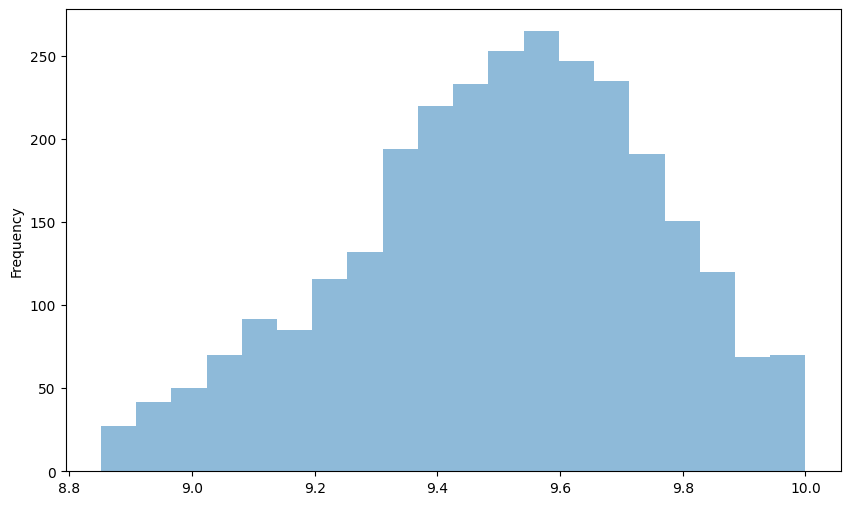

In [84]:
# 正常的店铺评分 分布情况
shop_score_gb = data.groupby('shop_id')['shop_score'].max()
shop_score_gb[shop_score_gb > 0].plot(kind='hist', bins=20, figsize=(10, 6), alpha=0.5)

## 用户信息

### age_range
- 正常了

In [85]:
# 不同age_range的 记录数
data['age_range'].value_counts().sort_index()

age_range
1    1684
2    1780
4    1656
5    8884
6    6470
Name: count, dtype: int64

In [86]:
# 不同年龄段的 用户数
print(data.groupby('age_range')['customer_id'].nunique())

age_range
1    1438
2    1543
4    1563
5    8102
6    5733
Name: customer_id, dtype: int64


### gender
- 性别为U的仍有 57 条记录

In [87]:
# 不同性别的记录数
data.value_counts('gender').sort_index()

gender
M    12508
U       57
W     7909
Name: count, dtype: int64

In [88]:
# 不同性别的用户数
print(data.groupby('gender')['customer_id'].nunique().sort_index())

gender
M    10925
U       55
W     7399
Name: customer_id, dtype: int64


### customer_level
- 等级为 2 级的记录/用户没了
- 等级为 3，4 级的记录/用户仍少

In [89]:
# 不同会员级别的记录数
print(data.groupby('customer_level')['customer_id'].size())

customer_level
1    4967
3      12
4      60
5    4842
6    3088
7    7505
Name: customer_id, dtype: int64


In [90]:
# 不同会员级别的用户
print(data.groupby('customer_level')['customer_id'].nunique())

customer_level
1    4573
3      12
4      60
5    4366
6    2899
7    6469
Name: customer_id, dtype: int64


### city_level
- 取值为 2 和 6 的仍少

In [91]:
# 不同城市等级的记录数
print(data.groupby('city_level')['customer_id'].size())

city_level
1    4559
2     235
3    5172
4    6005
5    4431
6      72
Name: customer_id, dtype: int64


In [92]:
# 不同城市等级的用户数
print(data.groupby('city_level')['customer_id'].nunique())

city_level
1    4028
2     214
3    4677
4    5437
5    3957
6      66
Name: customer_id, dtype: int64


### customer_register_date
- 用户注册的时间范围：2004-06-02 ~ 2018-04-15 
- 注册年份分布合理，非重复日期数 3395 （合理）

In [93]:
# 时间范围
print("最早日期：",data['customer_register_date'].min().date())
print("最晚日期：",data['customer_register_date'].max().date(),end='\n\n')

最早日期： 2004-06-02
最晚日期： 2018-04-15



In [94]:
# 不同年份注册的记录数
data.groupby(data['customer_register_date'].dt.year)['customer_id'].size()

customer_register_date
2004       2
2005      11
2006      19
2007      50
2008     202
2009     448
2010    1069
2011    1757
2012    2285
2013    2049
2014    2305
2015    2866
2016    2994
2017    3090
2018    1327
Name: customer_id, dtype: int64

In [95]:
# 不同年份注册的用户数
data.groupby(data['customer_register_date'].dt.year)['customer_id'].nunique()

customer_register_date
2004       2
2005      10
2006      17
2007      45
2008     175
2009     402
2010     915
2011    1547
2012    2011
2013    1836
2014    2089
2015    2620
2016    2744
2017    2764
2018    1202
Name: customer_id, dtype: int64

In [96]:
# 去重后日期数
data['customer_register_date'].nunique()

3395

## 商品信息

In [97]:
# 每个品类，每个品牌有多少商品

product_count = data.groupby(['category','brand'])['product_id'].nunique()
product_count
# product_count.to_csv('product_count.csv')

category          brand     
Air Conditioner   Gree          139
                  Midea          76
Badminton         Li-Ning       100
Basketball        Li-Ning        69
Basketball Shoes  Anta            3
                               ... 
Washing Machine   Haier           8
                  Konka          33
                  LittleSwan     99
                  Midea          38
Xbox              Microsoft     144
Name: product_id, Length: 203, dtype: int64

### brand
- 72个产品品牌
- 注意 other 占比较大，应该是每个类别都有 other 

In [100]:
# 产品品牌数
data['brand'].nunique()

72

In [101]:
# 不同品牌的 记录数量 分布
brand_counts = data['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']

# 创建动态图表
fig = px.bar(brand_counts, x='brand', y='count', title='Brand Frequency', 
             labels={'count': '记录数', 'brand': 'Brand'},
             text='count')
fig.update_layout(
    xaxis=dict(tickangle=45)
)
# 显示图表
fig.show()

In [102]:
# 不同品牌的 商品数量 分布
brand_counts = data.groupby(['brand'])['product_id'].nunique().sort_values(ascending=False).reset_index()
brand_counts.columns = ['brand', 'count']

# 创建动态图表
fig = px.bar(brand_counts, x='brand', y='count', title='Brand Frequency', 
             labels={'count': '商品数', 'brand': 'Brand'},
             text='count')
fig.update_layout(
    xaxis=dict(tickangle=45)
)
# 显示图表
fig.show()

### category
- 53 个产品种类

In [103]:
# 产品种类数
data['category'].nunique()

53

In [104]:
# 不同种类的 记录数量 分布 
category_counts = data['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# 创建动态图表
fig = px.bar(category_counts, x='category', y='count', title='category Frequency', 
             labels={'count': '记录数', 'category': 'category'},
             text='count')
fig.update_layout(
    xaxis=dict(tickangle=45)
)
# 显示图表
fig.show()

In [105]:
#  不同种类的 商品数量 分布 
category_counts = data.groupby(['category'])['product_id'].nunique().sort_values(ascending=False).reset_index()
category_counts.columns = ['category', 'count']

# 创建动态图表
fig = px.bar(category_counts, x='category', y='count', title='category Frequency', 
             labels={'count': '商品数', 'category': 'category'},
             text='count')
fig.update_layout(
    xaxis=dict(tickangle=45)
)
# 显示图表
fig.show()

### product_market_date
- 产品上市日期


In [106]:
# 时间范围
print("最早日期：",data['product_market_date'].min().date())
print("最晚日期：",data['product_market_date'].max().date())

最早日期： 2008-05-16
最晚日期： 2018-04-14


In [107]:
# 不同年份的商品 记录数
data.groupby(data['product_market_date'].dt.year)['product_id'].size()

product_market_date
2008       5
2009      43
2010     303
2011     261
2012     548
2013     780
2014    1347
2015    2391
2016    4463
2017    8011
2018    2322
Name: product_id, dtype: int64

In [108]:
# 不同年份的商品 商品数
print(data.groupby(data['product_market_date'].dt.year)['product_id'].nunique())

product_market_date
2008       2
2009      19
2010     112
2011     108
2012     239
2013     429
2014     713
2015    1420
2016    2646
2017    5131
2018    1540
Name: product_id, dtype: int64


## 用户行为

### customer_id 
- 去重后用户数: 18379


In [109]:
# 去重后用户数
data['customer_id'].nunique()

18379

### product_id
- 去重后商品数: 12359

In [110]:
# 去重后商品数
data['product_id'].nunique()

12359

### action_date  
- datetime类型，从2018-4-8到2018-4-15

In [112]:
# 时间范围
print("最早日期：",data['action_date'].min().date())
print("最晚日期：",data['action_date'].max().date(),end='\n\n')

最早日期： 2018-04-08
最晚日期： 2018-04-15



### type 
- 行为类别，有PageView,Follow,SaveCart,Order,Comment这5种取值
- 用户路径正常了

In [113]:
# 行为类型的分布情况
print(data['type'].value_counts())

type
PageView     15485
SavedCart     2987
Order         1229
Comment        515
Follow         258
Name: count, dtype: int64
